## Author: Jarren Javier

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Intro

The goal for any good marketing campaign is to have a strategic effort by the company to
raise awareness of a product being sold or to capture the attention of a customer. As a marketing
analyst, it is one’s job to analyze the data on customers and find out why a marketing campaign
may or may not be successful. Through the use of data analytics, an analyst can better understand
the problem and present a data-driven solution to the correct stakeholders.

The data set analyzed in this report is a fictional dataset taken from the Advanced Data
Analytics course in the Master of Science Business Analytics program at Hult International
Business School. The data set can be accessed on Kaggle’s website: eCommerce Marketing
Analytics. The entire analysis was run using Python and stored in a Jupyter Notebook. The
methodology of analysis taken was to first use descriptive statistics to gain a better understanding
of the company’s customer base. Next a predictive linear regression model was produced to help
predict the number of store purchases for the company. Lastly, more descriptive analytics was
performed to find out what campaign was most successful and what the average customer looked
like for that campaign

## Table of Contents

### 1) Data Cleaning

### 2) Exploratory Data Analysis

### 3) Regression Analysis for Number of Store Purchases

### 4) Which Campaign Performed the Best?

### 5) Conclusion

# Part 1 - Data Cleaning

In [2]:
#load market data
df = pd.read_csv("marketing_data.csv")

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,9432,1977,Graduation,Together,"$666,666.00",1,0,6/2/13,23,9,...,3,6,0,0,0,0,0,0,0,SA
1,1503,1976,PhD,Together,"$162,397.00",1,1,6/3/13,31,85,...,1,1,0,0,0,0,0,0,0,SP
2,1501,1982,PhD,Married,"$160,803.00",0,0,8/4/12,21,55,...,1,0,0,0,0,0,0,0,0,US
3,5336,1971,Master,Together,"$157,733.00",1,0,6/4/13,37,39,...,1,1,0,0,0,0,0,0,0,SP
4,8475,1973,PhD,Married,"$157,243.00",0,1,3/1/14,98,20,...,0,0,0,0,0,0,0,0,0,IND


### Check data types

In [5]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
#check dimensions
df.shape

(2240, 28)

### Look for Null Values

In [7]:
#check for NaN values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [8]:
#drop rows with NaN values
df1 = df.dropna()

In [9]:
#check if any NaN values still exist
df1.isnull().values.any()

False

### Adjust Date Type

In [10]:
#convert dt_customer to date
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])

In [11]:
df1['Income'] = df1['Income'].str.replace('$', '')
df1['Income'] = df1['Income'].str.replace(',', '').astype(float)

### Create Total Columns

In [12]:
#Calculate Total Purchases
total_purchases = df1[['NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

In [13]:
df1.columns.get_loc("NumStorePurchases")

18

In [14]:
#Create Total Purchases Column
df1.insert(19, 'Total_Purchases',total_purchases)

In [15]:
#Calculate Total Amount Spent
total_spent = df1[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum(axis=1)

In [16]:
df1.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Total_Purchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,7,6,0,0,0,0,0,0,0,SA
1,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,1,0,0,0,0,0,0,0,SP


In [17]:
#Create Total Amount Spent Column
df1.insert(15, 'Total_Spent',total_spent)

In [18]:
df1.columns.get_loc("Teenhome")

6

In [19]:
#Calculate Total Dependents
dependents = df1[['Kidhome','Teenhome']].sum(axis=1)

In [20]:
#Create Dependents Column
df1.insert(6, 'Dependents',dependents)

In [21]:
#check for changes
df1[['Total_Spent','Total_Purchases','Dependents']].head(2)

,Total_Spent,Total_Purchases,Dependents
0,62,7,1
1,107,1,2


### Change Column Names

In [22]:
#convert yolo, absurd and alone into one value 'single'
df1['Marital_Status'] = df1['Marital_Status'].str.replace('YOLO', 'Single')
df1['Marital_Status'] = df1['Marital_Status'].str.replace('Alone', 'Single')
df1['Marital_Status'] = df1['Marital_Status'].str.replace('Absurd', 'Single')

In [23]:
df1['Marital_Status'].unique()

array(['Together', 'Married', 'Divorced', 'Single', 'Widow'], dtype=object)

In [24]:
#update Education Categories
df1['Education'] = df1['Education'].replace(['Graduation'],'Bachelor')
df1['Education'] = df1['Education'].replace(['2n Cycle'],'Bachelor')
df1['Education'] = df1['Education'].replace(['Basic'],'HighSchool')

In [25]:
#list all unique eduation types
df1['Education'].unique()

array(['Bachelor', 'PhD', 'Master', 'HighSchool'], dtype=object)

In [26]:
#set index
df1.index = df1["ID"]

#delete index
del df1["ID"]

In [27]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df1.describe()

,Year_Birth,Income,Kidhome,Dependents,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,Total_Purchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,...,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00
mean,1968.82,52247.25,0.44,0.95,0.51,49.01,305.09,26.36,167.00,37.64,...,5.80,12.56,5.32,0.07,0.07,0.07,0.06,0.01,0.15,0.01
std,11.99,25173.08,0.54,0.75,0.54,28.95,337.33,39.79,224.28,54.75,...,3.25,7.20,2.43,0.26,0.26,0.26,0.24,0.12,0.36,0.10
min,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1959.00,35303.00,0.00,0.00,0.00,24.00,24.00,2.00,16.00,3.00,...,3.00,6.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1970.00,51381.50,0.00,1.00,0.00,49.00,174.50,8.00,68.00,12.00,...,5.00,12.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1977.00,68522.00,1.00,1.00,1.00,74.00,505.00,33.00,232.25,50.00,...,8.00,18.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1996.00,666666.00,2.00,3.00,2.00,99.00,1493.00,199.00,1725.00,259.00,...,13.00,32.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Create Numerical and Categorical Variable Data Frame

In [28]:
#create data frame with only categorical variables
categorical = df1[['Marital_Status','Education','Country']]
categorical.head(3)

,Marital_Status,Education,Country
ID,,,
9432,Together,Bachelor,SA
1503,Together,PhD,SP
1501,Married,PhD,US


In [29]:
#create dataf rame with only numerical variables
numerical = df1.drop(['Education','Marital_Status','Country','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                      'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'],axis=1)

In [30]:
#convert int to numerical
numerical['Income'] = numerical['Income'].astype('int64')

In [31]:
numerical['Income'].dtypes

dtype('int64')

In [32]:
numerical.head(2)

,Year_Birth,Income,Kidhome,Dependents,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchases,NumWebVisitsMonth
ID,,,,,,,,,,,,,,,,,,,,
9432,1977,666666,1,1,0,2013-06-02,23,9,14,18,8,1,12,62,4,3,1,3,7,6
1503,1976,162397,1,2,1,2013-06-03,31,85,1,16,2,1,2,107,0,0,0,1,1,1


# Part 2 - Exploratory Data Analysis

## Customer Count by Martial Status, Education, Country

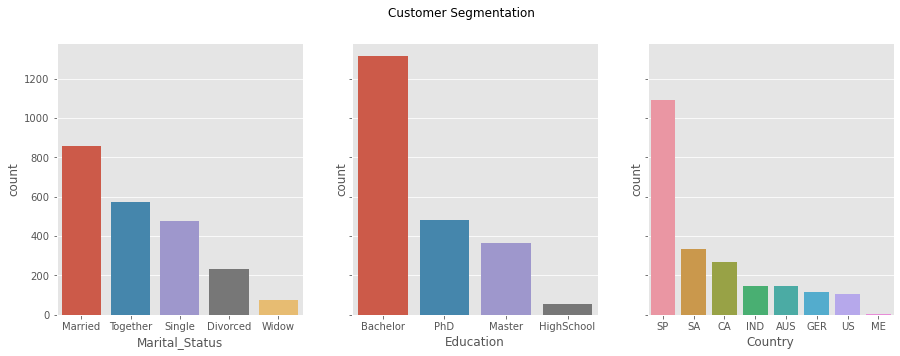

In [33]:
plt.style.use('ggplot')

#create bar chart for categorical variables
fig, axes = plt.subplots(1,3, figsize=(15, 5), sharey=True)
fig.suptitle('Customer Segmentation')

#marital_status
sns.countplot(ax=axes[0], x='Marital_Status', data=df1,
              order = df1['Marital_Status'].value_counts().index)

#Education
sns.countplot(ax=axes[1], x='Education', data=df1,
             order = df1['Education'].value_counts().index)

#Country
sns.countplot(ax=axes[2], x='Country', data=df1,
             order = df1['Country'].value_counts().index)

plt.show()

In [34]:
print(df1['Education'].value_counts(),'\n')
print(df1['Marital_Status'].value_counts(),'\n')
print(df1['Country'].value_counts(),'\n')

Bachelor      1316
PhD            481
Master         365
HighSchool      54
Name: Education, dtype: int64 

Married     857
Together    573
Single      478
Divorced    232
Widow        76
Name: Marital_Status, dtype: int64 

SP     1093
SA      337
CA      266
IND     147
AUS     147
GER     116
US      107
ME        3
Name: Country, dtype: int64 



###  First impressions depict that most customers in the database are in a relationship (Married or Together), have at least a bachelor's education, and mostly reside in Spain.
### Side Note: 38.62% of customers have either a master's degree or PHD.  Only 2.44% of customers have high school as their highest education level. Customers in this database are majority educated.

## Numerical Variables Boxplot

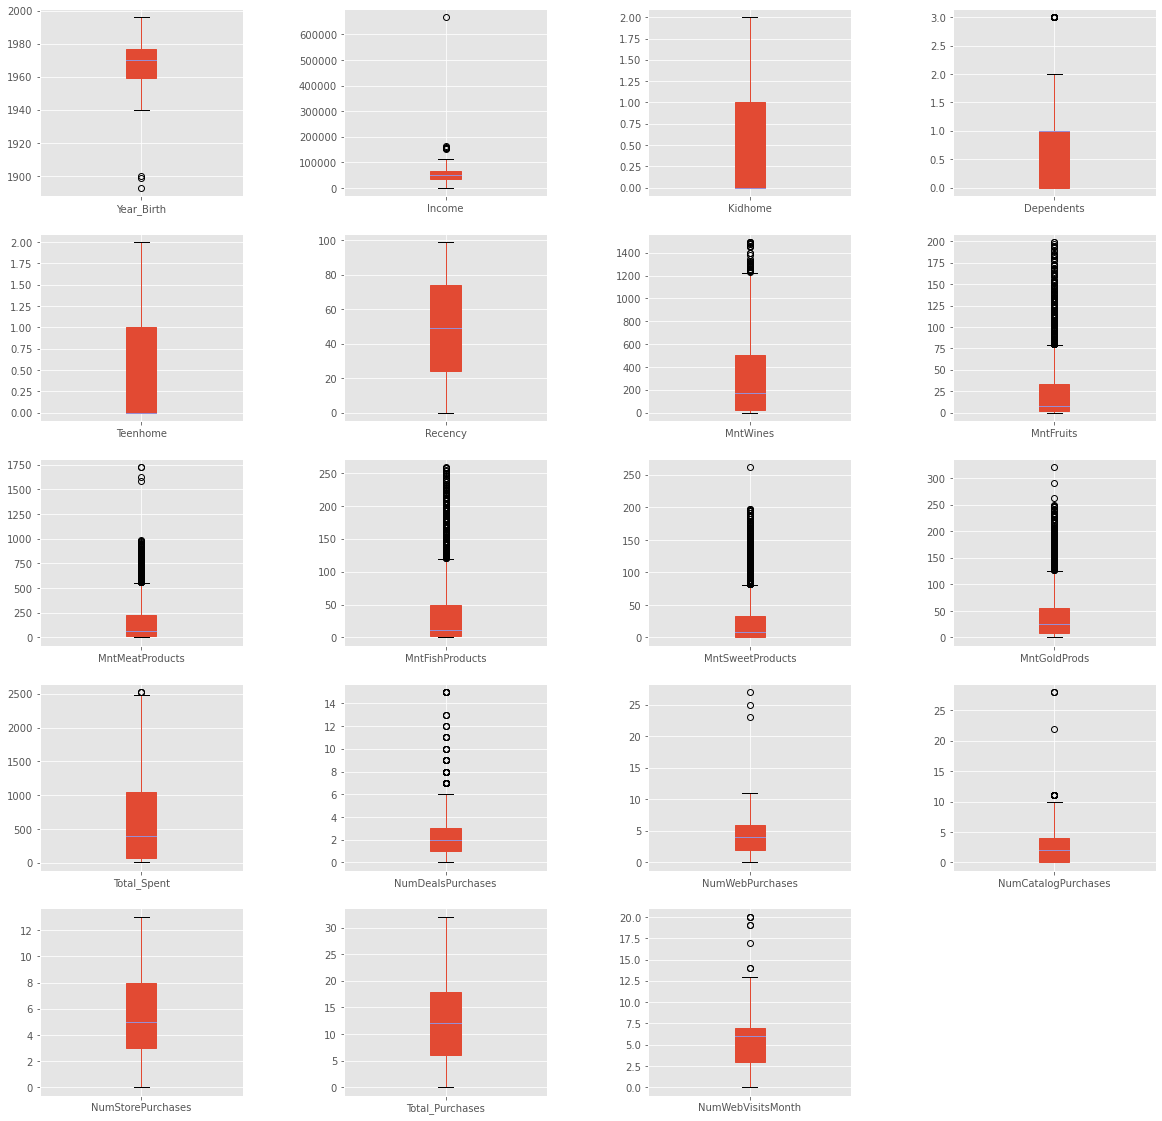

In [66]:
plt.style.use('ggplot')
numerical.plot(subplots=True, layout=(5,4), kind='box', 
               figsize=(20,20), patch_artist=True,)
plt.subplots_adjust(wspace=0.5)
plt.title("Numerical Variables Boxplot",fontsize=16)
plt.show()

### Boxplot Notes
- The boxplot distribution shows that the customers 50% of the customer's most recent purchase was between 25-75 days and on average around 49 days.
- There are a lot of outliers in the amount spent for all of the various product types, these could be more frequent customers or people making bigger purchases.
- The majority of customers have either 0 or 1 dependents at home.
- Total spent from customers looks to be between 10-1000 USD


### Calculate Sales By Product

In [36]:
ProductSales = df1[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']]

Sales By Product 
 MntWines           305.09
MntFruits           26.36
MntMeatProducts    167.00
MntFishProducts     37.64
MntSweetProducts    27.03
MntGoldProds        43.97
dtype: float64


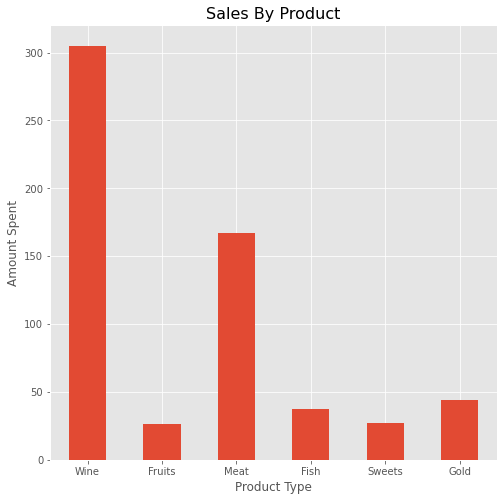

In [37]:
#changed to mean
money_spent = ProductSales.mean()

plt.style.use('ggplot')
money_spent.plot(kind='bar',figsize=(8,8))
plt.xticks([0, 1, 2, 3, 4, 5], ['Wine','Fruits','Meat','Fish','Sweets', 'Gold'])
plt.xticks(rotation = 0)
plt.title('Sales By Product',fontsize=16)
plt.ylabel('Amount Spent')
plt.xlabel('Product Type')

print('Sales By Product \n', money_spent)

## Which country has the biggest market?

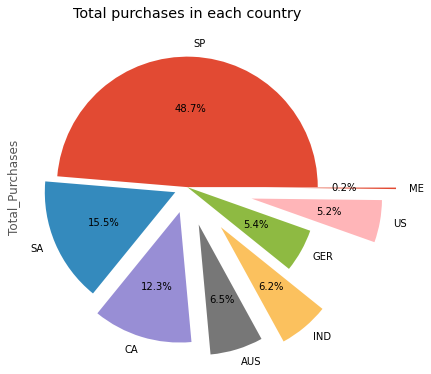

In [39]:
plt.figure(figsize=(12,6))
explode = (0, 0.1, 0.2, 0.3, 0.4, 0, 0.5, 0.6)
df1.groupby('Country')['Total_Purchases'].sum().sort_values(ascending=False).plot(kind='pie',autopct = '%1.1f%%',explode = explode)
plt.title('Total purchases in each country');


### What Are Average Product Sales By Country?

In [40]:
country_prod = df1[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Country']]

         MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Country                                                          
AUS        290.83      25.10           151.89            37.73   
CA         316.04      28.88           172.65            37.52   
GER        317.03      25.69           174.76            39.66   
IND        246.50      25.77           161.42            32.78   
ME         576.33       2.67           272.33            75.33   
SA         314.30      26.52           173.29            40.56   
SP         307.77      25.88           163.23            36.74   
US         301.07      28.36           188.64            41.22   

         MntSweetProducts  MntGoldProds  
Country                                  
AUS                 28.09         48.52  
CA                  28.60         45.65  
GER                 24.15         49.72  
IND                 21.91         40.91  
ME                  40.67         73.33  
SA                  26.76         44.89  
SP 

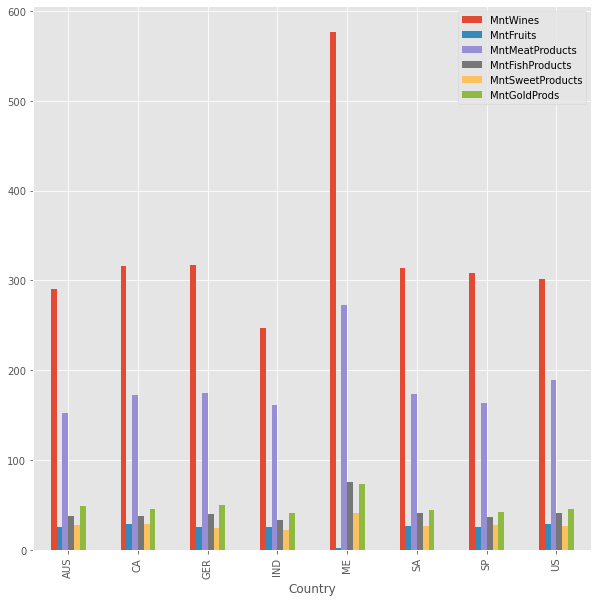

In [41]:
country_sales_avg = country_prod.groupby(['Country']).mean()
print(country_sales_avg)
country_sales_avg.plot(kind='bar',figsize=(10,10))
plt.show()

### The average amount spent on the different product types are nearly the same for each customer in country with the exception to Mexcio. Mexico's market is very small with only 3 customers and is not very reflective of the entire market. This higher average spent on wine reflects the bigger distribution in the graph. Majority of customers from each country on average have spent close to 300 USD on wine and 150 USD on meat products.

In [42]:
#how many customers are there in mexico?
country_prod[country_prod['Country']  == 'ME']

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Country
ID,,,,,,,
5080,420,0,452,182,64,140,ME
2920,789,0,142,12,9,38,ME
9323,520,8,223,32,49,42,ME


In [43]:
#country_sales_sum = country_prod.groupby(['Country']).sum()
#print(country_sales)
#country_sales_sum.plot(kind='bar',figsize=(10,10))
#plt.show()

## Part 3 - Regression Analysis for Number of Store Purchases

### Create Separate Dataframe

In [111]:
store_df = df1.copy()
store_df.reset_index(drop=True, inplace=True)
store_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Dependents,Teenhome,Dt_Customer,Recency,MntWines,...,Total_Purchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1977,Bachelor,Together,666666.00,1,1,0,2013-06-02,23,9,...,7,6,0,0,0,0,0,0,0,SA
1,1976,PhD,Together,162397.00,1,2,1,2013-06-03,31,85,...,1,1,0,0,0,0,0,0,0,SP
2,1982,PhD,Married,160803.00,0,0,0,2012-08-04,21,55,...,29,0,0,0,0,0,0,0,0,US
3,1971,Master,Together,157733.00,1,1,0,2013-06-04,37,39,...,2,1,0,0,0,0,0,0,0,SP
4,1973,PhD,Married,157243.00,0,1,1,2014-03-01,98,20,...,22,0,0,0,0,0,0,0,0,IND


### What features are most correlated with Number of Store Purchases?

### Correlation Without Categorical Variables

In [112]:
StorePurchase_Corr = store_df.corr()['NumStorePurchases'].sort_values(ascending=False)
print('Store Purchase Correlation: \n\n', StorePurchase_Corr)

Store Purchase Correlation: 

 NumStorePurchases      1.00
Total_Purchases        0.86
Total_Spent            0.68
MntWines               0.64
Income                 0.53
NumCatalogPurchases    0.52
NumWebPurchases        0.52
MntMeatProducts        0.49
MntFruits              0.46
MntFishProducts        0.46
MntSweetProducts       0.46
MntGoldProds           0.39
AcceptedCmp5           0.21
AcceptedCmp1           0.18
AcceptedCmp4           0.18
AcceptedCmp2           0.09
NumDealsPurchases      0.07
Teenhome               0.05
Response               0.04
Recency               -0.00
Complain              -0.02
AcceptedCmp3          -0.07
Year_Birth            -0.13
Dependents            -0.32
NumWebVisitsMonth     -0.43
Kidhome               -0.50
Name: NumStorePurchases, dtype: float64


#### Correlation Analysis between Number of Store Purchases and the other variables show that the highest positive correlation are 1) Total Purchases, 2) Total Spent, and 3) Amount Spent on Wines. 

#### The highest negative correlation are 1) KidHome, 2) Number of Web Visist per Month, and 3) Dependents



### Store Purchases Heat Map

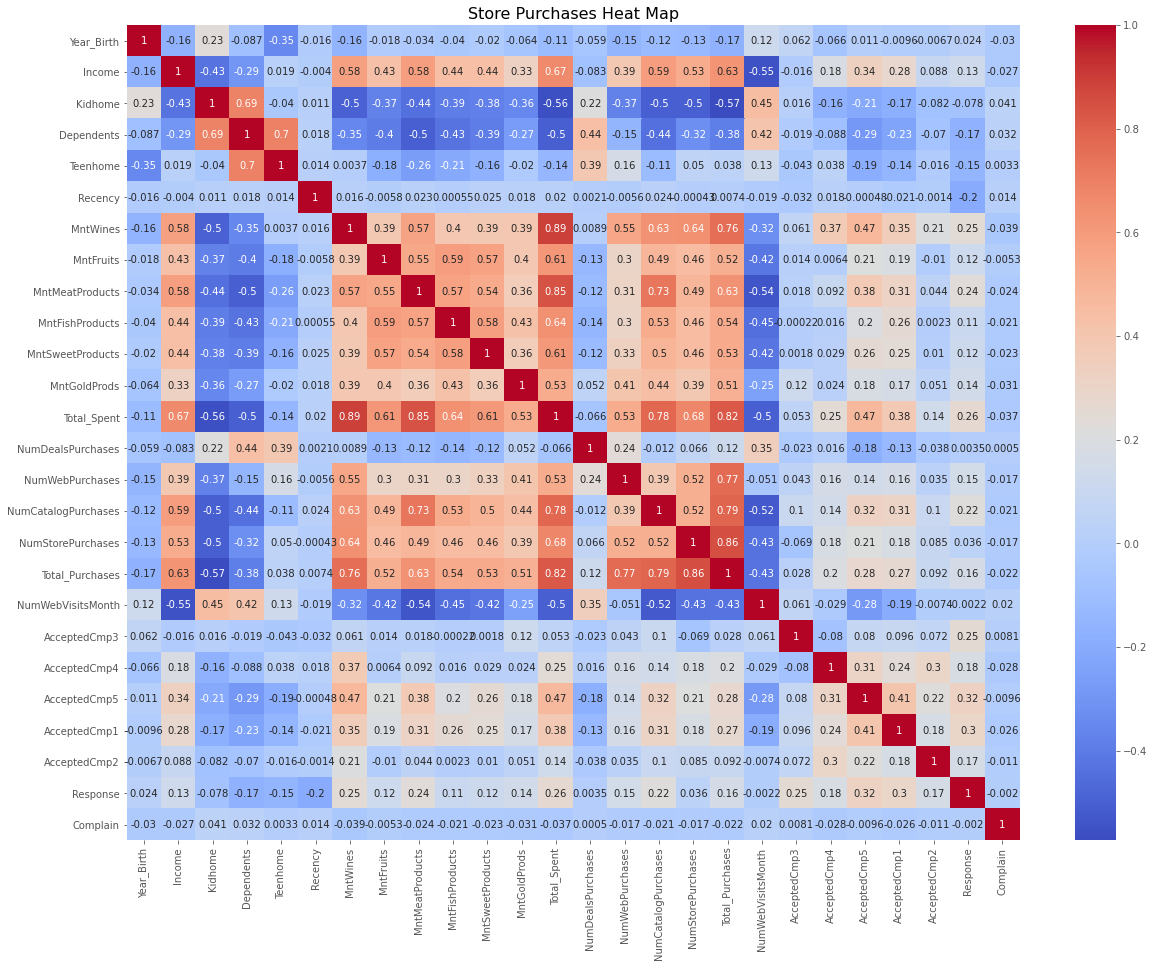

In [113]:
plt.figure(figsize=(20,15))
sns.heatmap(store_df.corr(),cmap='coolwarm',annot=True)
plt.title("Store Purchases Heat Map",fontsize=16)
plt.show()

### Encode Dummy Variables

In [115]:
# Use one hot encoding
from sklearn.preprocessing import OneHotEncoder

In [118]:
store_df.drop("Dt_Customer", axis=1, inplace=True)

In [119]:
# get categorical features and review number of unique values
cat = store_df.select_dtypes(exclude=np.number)
print("Number of unique values per categorical feature:\n", cat.nunique())

# use one hot encoder
enc = OneHotEncoder(sparse=False).fit(cat)
cat_encoded = pd.DataFrame(enc.transform(cat))
cat_encoded.columns = enc.get_feature_names(cat.columns)

# merge with numeric data
num = store_df.drop(columns=cat.columns)
store_df2 = pd.concat([cat_encoded, num], axis=1)
store_df2.head()

Number of unique values per categorical feature:
 Education         4
Marital_Status    5
Country           8
dtype: int64


,Education_Bachelor,Education_HighSchool,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Country_AUS,...,NumStorePurchases,Total_Purchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,3,7,6,0,0,0,0,0,0,0
1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1,1,1,0,0,0,0,0,0,0
2,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1,29,0,0,0,0,0,0,0,0
3,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1,2,1,0,0,0,0,0,0,0
4,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0,22,0,0,0,0,0,0,0,0


### Correlation With Encoded Variables

In [128]:
store_df2.corr()['NumStorePurchases'].sort_values(ascending=False)

NumStorePurchases          1.00
Total_Purchases            0.86
Total_Spent                0.68
MntWines                   0.64
Income                     0.53
NumCatalogPurchases        0.52
NumWebPurchases            0.52
MntMeatProducts            0.49
MntFruits                  0.46
MntFishProducts            0.46
MntSweetProducts           0.46
MntGoldProds               0.39
AcceptedCmp5               0.21
AcceptedCmp1               0.18
AcceptedCmp4               0.18
AcceptedCmp2               0.09
NumDealsPurchases          0.07
Teenhome                   0.05
Education_PhD              0.04
Response                   0.04
Marital_Status_Widow       0.03
Country_US                 0.02
Country_GER                0.02
Country_SA                 0.01
Marital_Status_Married     0.01
Education_Master           0.01
Country_ME                 0.01
Country_CA                 0.00
Marital_Status_Divorced    0.00
Recency                   -0.00
Education_Bachelor        -0.00
Country_

### Run Regression Tests 

### Use OLS model with top 6 Correlated Variables for model to predict Number of Store Purchases

In [164]:
formula_1 = 'NumStorePurchases ~ Total_Spent + Income + MntWines + NumCatalogPurchases + NumWebPurchases + MntMeatProducts'


In [176]:
model_1 = ols(formula_1,store_df2).fit()
aov_table = sm.stats.anova_lm(model_1, typ=2)
print(aov_table)

                      sum_sq      df      F  PR(>F)
Total_Spent           669.63    1.00 130.69    0.00
Income                240.22    1.00  46.88    0.00
MntWines               78.66    1.00  15.35    0.00
NumCatalogPurchases     0.01    1.00   0.00    0.97
NumWebPurchases       421.91    1.00  82.34    0.00
MntMeatProducts       322.06    1.00  62.85    0.00
Residual            11318.80 2209.00    nan     nan


In [177]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:      NumStorePurchases   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     393.2
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:12:59   Log-Likelihood:                -4951.3
No. Observations:                2216   AIC:                             9917.
Df Residuals:                    2209   BIC:                             9956.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.3194    

### Run Linear Regression From SKLearn

In [166]:
from sklearn.linear_model import LinearRegression

In [169]:
store_df2

,Education_Bachelor,Education_HighSchool,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Country_AUS,...,NumStorePurchases,Total_Purchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,3,7,6,0,0,0,0,0,0,0
1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1,1,1,0,0,0,0,0,0,0
2,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1,29,0,0,0,0,0,0,0,0
3,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1,2,1,0,0,0,0,0,0,0
4,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0,22,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0,25,1,0,0,0,0,0,0,0
2212,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0,0,19,0,0,0,0,0,0,0
2213,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0,0,14,0,0,0,0,0,0,0
2214,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0,28,1,0,0,0,0,0,0,0


In [170]:
model = LinearRegression()

#### Remove Total_Purcahses as it factors in NumStorePurchases and is too highly correlated

In [171]:
X = store_df2.drop(['NumStorePurchases','Total_Purchases'],axis=1)

In [172]:
y = store_df2.NumStorePurchases

In [173]:
model.fit(X,y)

LinearRegression()

In [174]:
print('Accuracy Score: ', model.score(X,y))

Accuracy Score:  0.5926698104111373


### Results

### Total Purchases was removed from both models as it is a feature engineered from NumStorePurchases and is too highly correlated.  Total_Spent + Income + MntWines + NumCatalogPurchases + NumWebPurchases + MntMeatProducts are the top 6 variables correlated with Number of Store Purchases. Using these variables in the ordinary least squares model produced an accuracy score of 51.6%. The second Linear Regerssion model produced a 59.26% accuracy score using all variables exluding TotalPurchases. The total increase in accuracy was 7.66%. With this information, the company can better predict how much inventory to purchase and have in stock at a time to reduce waste and increase profits.

## Feature Selection

## Univariate Selection

Statistical tests are used to select features that have strong relationship with output variable, NumStorePurchases

Using Scikit-learn library and implement SlectKBest class that can be used with a suite of diffrerent statistical tests to select a specific number of features.

We will use the chi-squared statistical test for non-negative features to select the 10 beast features for Number of store purchases


- Null hypothesis(H0): there is a no relationship between the variables
- Alternative hypothesis(H1): there is a relationship between numstorepurchases and the independent variables

## Part 4 - Which Campaign Performed the Best?

In [44]:
#create data frame where only one campaign is accepted
campaign_correct = df1[((df1.AcceptedCmp1 + df1.AcceptedCmp2 + 
             df1.AcceptedCmp3+ df1.AcceptedCmp4+ df1.AcceptedCmp5 )  == 1 ) ]

### There are several instances where multiple campaigns were accepted and a response was given by customers. For example campaign 1 and campaign 2 were accepted and received a response. Due to the way the data is set up, it is impossible to tell what campaign was responded to the most. In order to distinguish what campaign holds significance, only isntances where one campaign was accepted was kept for analysis.

In [45]:
campaign_correct.head(3)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Dependents,Teenhome,Dt_Customer,Recency,MntWines,...,Total_Purchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
ID,,,,,,,,,,,,,,,,,,,,,
4248,1960,Master,Single,98777.00,0,0,0,2014-02-17,23,1000,...,19,1,0,1,0,0,0,0,0,SP
7451,1960,Master,Single,98777.00,0,0,0,2014-02-17,23,1000,...,19,1,0,1,0,0,0,0,0,SP
2109,1990,Bachelor,Single,96843.00,0,0,0,2013-04-23,60,448,...,27,2,0,0,1,0,0,1,0,SP


In [46]:
#create df with only campaign acceptance
campaigns = campaign_correct[["AcceptedCmp1",
                              "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"]]

In [47]:
#get sum of each campaign accpetance
campaign_acceptance = campaigns.sum()

AcceptedCmp1     52
AcceptedCmp2      1
AcceptedCmp3    129
AcceptedCmp4     83
AcceptedCmp5     58
dtype: int64


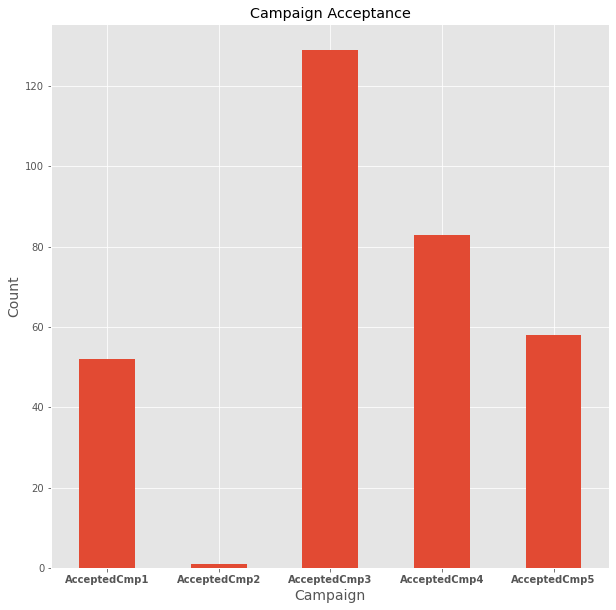

In [48]:
print(campaign_acceptance)

campaign_acceptance.plot(kind='bar',figsize=(10,10))

plt.xticks(rotation = 0,weight="bold")

plt.title('Campaign Acceptance')
plt.xlabel('Campaign',fontsize=14)
plt.ylabel('Count',fontsize=14)

plt.show()

In [49]:
campaign_response = df1[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3",
                         "AcceptedCmp4","AcceptedCmp5","Response"]]

In [50]:
print(campaign_acceptance)

#calculate reponse rate success for each campaign
response_rate = campaign_response.groupby(["Response"]).sum()
response_rate

AcceptedCmp1     52
AcceptedCmp2      1
AcceptedCmp3    129
AcceptedCmp4     83
AcceptedCmp5     58
dtype: int64


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Response,,,,,
0,63,10,86,102,71
1,79,20,77,62,91


In [51]:
#calculate response acceptance rate
print('Campaign 1 Reponse Rate:',(13/52)*100)
print('Campaign 2 Reponse Rate:',(1/1)*100)
print('Campaign 3 Reponse Rate:',(55/129)*100)
print('Campaign 4 Reponse Rate:',(11/83)*100)
print('Campaign 5 Reponse Rate:',(20/58)*100)


Campaign 1 Reponse Rate: 25.0
Campaign 2 Reponse Rate: 100.0
Campaign 3 Reponse Rate: 42.63565891472868
Campaign 4 Reponse Rate: 13.253012048192772
Campaign 5 Reponse Rate: 34.48275862068966


## Campaign Reponse Rate Analysis
#### Based on reponsonse rate of 42.64% for Campaign 3 its high acceptance count (129), Campaign looks to be the most successful by far. Campaign 2 only had 1 response from a customer where it was the only campaign accepted. There is not enough data to analyze Campaign 2 thoroughly. Campaign 1 (52 acceptants) and Campaign 5 (58 acceptants) making them not as significant as Campaign 3. Campaign 4 had the lowest response rate at 13.25%. This indicates Campaign 4 was the least liked by customers and should not be used any further.

## Analysis of Campaign 3 

In [52]:
print('Campaign 3 Reponse Rate:',(55/129)*100)

Campaign 3 Reponse Rate: 42.63565891472868


### What does the average customer who responded to Campaign 3 look like?

In [53]:
campaign3 = campaign_correct.drop(['AcceptedCmp1','AcceptedCmp2',
                            'AcceptedCmp4','AcceptedCmp5'],axis=1)

In [54]:
campaign3_responded = campaign3[(campaign3.Response != 0 ) & (campaign3.AcceptedCmp3 != 0)]

In [55]:
campaign3_responded.shape

(55, 26)

In [56]:
#campaign3.corr()['AcceptedCmp3'].sort_values(ascending=False)

In [57]:
campaign3_responded.describe().loc[['count','mean']]

,Year_Birth,Income,Kidhome,Dependents,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchases,NumWebVisitsMonth,AcceptedCmp3,Response,Complain
count,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,...,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00
mean,1969.85,42664.02,0.56,0.91,0.35,33.09,282.49,23.42,129.98,26.07,...,532.85,2.58,4.51,3.20,4.18,11.89,6.76,1.00,1.00,0.02


### The average customer has an income of 42,664, was born in the year 1969, recently purchased within 33 days, has 1 dependent, and has spent 532 in the last two years.

In [58]:
campaign3_responded.describe()

,Year_Birth,Income,Kidhome,Dependents,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchases,NumWebVisitsMonth,AcceptedCmp3,Response,Complain
count,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,...,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00
mean,1969.85,42664.02,0.56,0.91,0.35,33.09,282.49,23.42,129.98,26.07,...,532.85,2.58,4.51,3.20,4.18,11.89,6.76,1.00,1.00,0.02
std,12.48,18642.13,0.54,0.62,0.48,26.35,358.42,34.88,184.90,41.50,...,592.68,1.78,3.30,3.19,2.69,8.14,1.55,0.00,0.00,0.13
min,1943.00,7500.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,...,18.00,0.00,0.00,0.00,2.00,3.00,2.00,1.00,1.00,0.00
25%,1963.50,30890.50,0.00,1.00,0.00,10.00,14.50,2.00,12.50,2.00,...,68.50,1.00,1.50,1.00,2.00,5.00,6.00,1.00,1.00,0.00
50%,1971.00,37774.00,1.00,1.00,0.00,27.00,96.00,8.00,52.00,7.00,...,246.00,2.00,4.00,2.00,3.00,10.00,7.00,1.00,1.00,0.00
75%,1978.50,51937.50,1.00,1.00,1.00,53.00,491.00,37.00,196.00,28.50,...,889.50,4.00,7.00,5.00,5.00,18.50,8.00,1.00,1.00,0.00
max,1990.00,86979.00,2.00,2.00,1.00,97.00,1181.00,185.00,835.00,160.00,...,2209.00,7.00,11.00,10.00,11.00,32.00,9.00,1.00,1.00,1.00


In [59]:
campaign3_responded.describe().to_csv("my_description.csv")

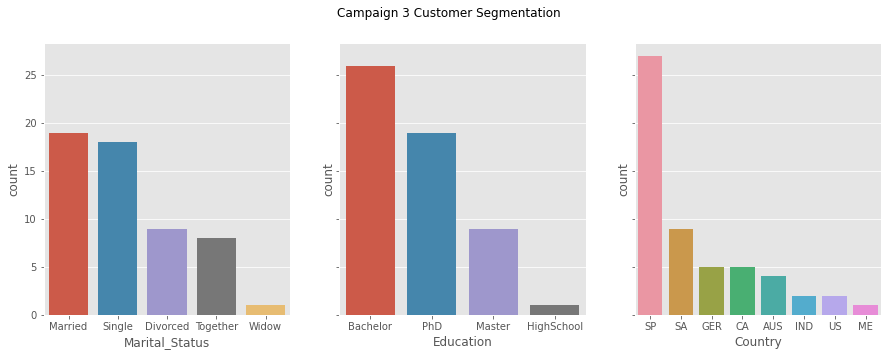

In [60]:
#create bar chart for categorical variables
fig, axes = plt.subplots(1,3, figsize=(15, 5), sharey=True)
fig.suptitle('Campaign 3 Customer Segmentation')
#marital_status
sns.countplot(ax=axes[0], x='Marital_Status', data=campaign3_responded,
              order = campaign3_responded['Marital_Status'].value_counts().index)

#Education
sns.countplot(ax=axes[1], x='Education', data=campaign3_responded,
              order = campaign3_responded['Education'].value_counts().index)

#Country
sns.countplot(ax=axes[2], x='Country', data=campaign3_responded,
                 order = campaign3_responded['Country'].value_counts().index)


### Customer demographic for Campaign 3 looks to be most popular with married/single, bachelor/PhD, and Spain/South America customers. With this information,the company can better target their campaigns to this particular demographic.

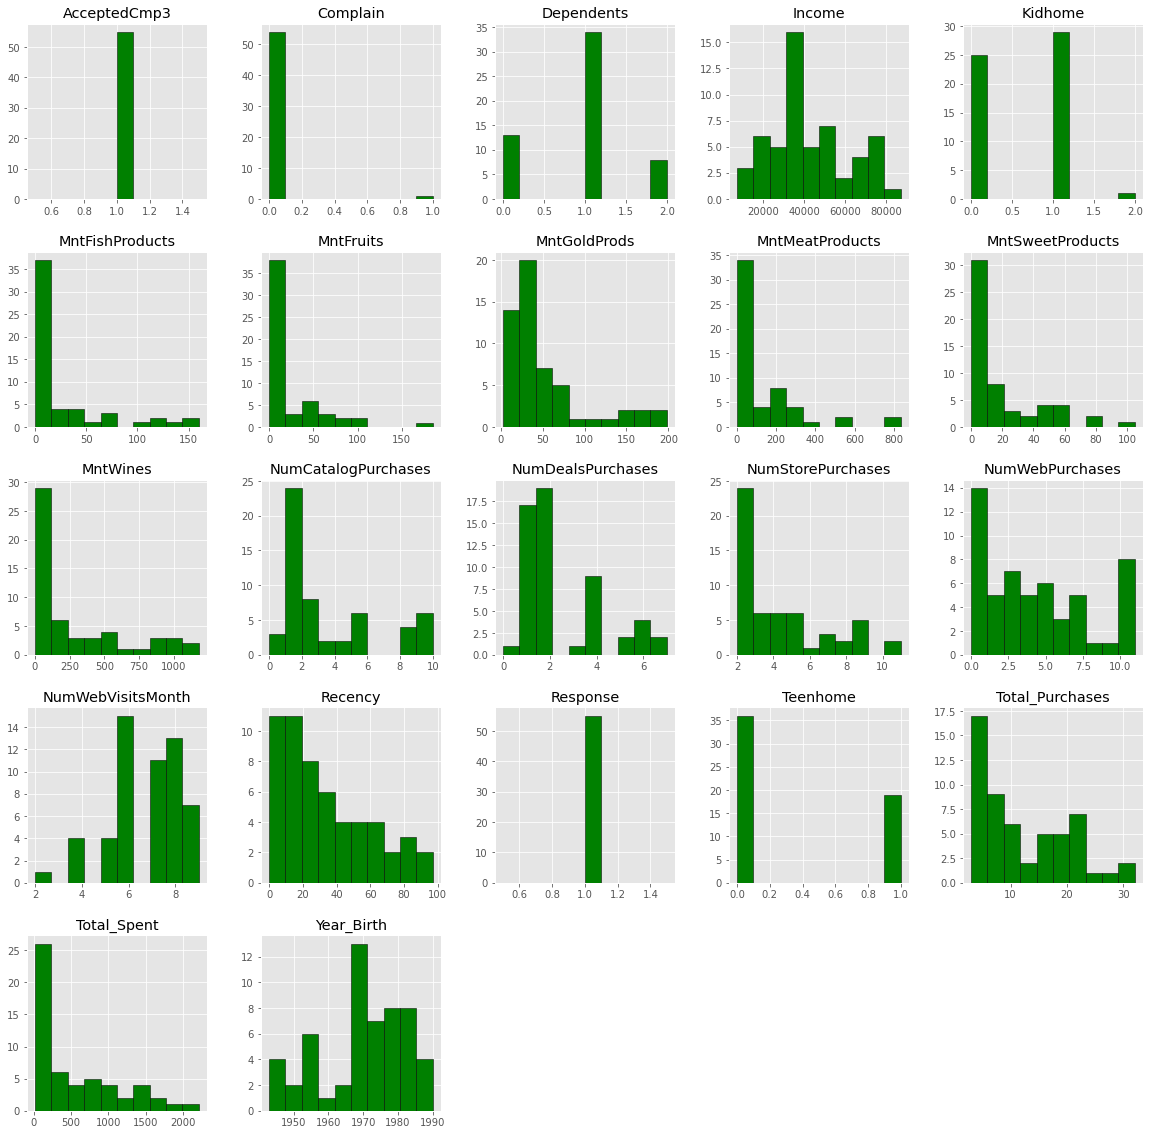

In [61]:
campaign3_responded.hist(color = 'green',edgecolor='black', figsize=(20,20))
plt.show()

# Part 5 - Conclusion

The analysis performed gives a lot of data driven insight the company can use to better
run the business. The exploratory analysis really highlighted that wine and meat are the best
selling products and are performing the same across all countries. Next it found that the average
recency of purchase was really high at 49 days and actions should be taken to get more frequent
customers. The results show Spain holds most of the company’s customer base and brings in
most of the revenue. The accuracy of the linear regression model for the number of store
purchases would be particularly helpful for the company in deciding how much stock to carry in
stores. If the company can more accurately predict the demand of customers, revenue can be
increased with better inventory management and the company will have a better cash flow.
Lastly, analysis of Campaign 3 will help provide the company with a better understanding of
their customer base for future campaigns. With better marketing Campaigns, the company can
reach the right customers, push the more popular products, and continue to grow their market in
other countries.